# Spotify Project

In [1]:
import config

In [2]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

In [3]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [4]:
X = pd.read_csv("combined.csv")

In [5]:
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.552,0.702,9,-5.707,1,0.1570,0.117000,0.000021,0.1050,0.5640,169.994,audio_features,1BxfuPKGuaTgP7aM0Bbdwr,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,https://api.spotify.com/v1/tracks/1BxfuPKGuaTg...,https://api.spotify.com/v1/audio-analysis/1Bxf...,178427,4
1,0.511,0.532,5,-5.745,1,0.0560,0.169000,0.000000,0.3110,0.3220,137.827,audio_features,3k79jB4aGmMDUQzEwa46Rz,spotify:track:3k79jB4aGmMDUQzEwa46Rz,https://api.spotify.com/v1/tracks/3k79jB4aGmMD...,https://api.spotify.com/v1/audio-analysis/3k79...,219724,4
2,0.855,0.678,1,-6.276,1,0.1890,0.056900,0.000037,0.4120,0.8520,99.029,audio_features,6WzRpISELf3YglGAh7TXcG,spotify:track:6WzRpISELf3YglGAh7TXcG,https://api.spotify.com/v1/tracks/6WzRpISELf3Y...,https://api.spotify.com/v1/audio-analysis/6WzR...,215467,4
3,0.671,0.845,11,-4.930,0,0.0480,0.020700,0.000000,0.3290,0.7750,110.056,audio_features,1vYXt7VSjH9JIM5oRRo7vA,spotify:track:1vYXt7VSjH9JIM5oRRo7vA,https://api.spotify.com/v1/tracks/1vYXt7VSjH9J...,https://api.spotify.com/v1/audio-analysis/1vYX...,176579,4
4,0.652,0.800,9,-4.019,0,0.0614,0.143000,0.629000,0.1120,0.2340,143.978,audio_features,7ro0hRteUMfnOioTFI5TG1,spotify:track:7ro0hRteUMfnOioTFI5TG1,https://api.spotify.com/v1/tracks/7ro0hRteUMfn...,https://api.spotify.com/v1/audio-analysis/7ro0...,231704,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9036,0.511,0.978,7,-3.867,1,0.0654,0.000185,0.000893,0.3080,0.2330,115.046,audio_features,1vCZDcHV3VaL14O01iUQVQ,spotify:track:1vCZDcHV3VaL14O01iUQVQ,https://api.spotify.com/v1/tracks/1vCZDcHV3VaL...,https://api.spotify.com/v1/audio-analysis/1vCZ...,389947,4
9037,0.342,0.926,7,-6.313,0,0.0939,0.000040,0.683000,0.1860,0.0972,147.313,audio_features,14JG4VbsqeLsFuDJlkybOT,spotify:track:14JG4VbsqeLsFuDJlkybOT,https://api.spotify.com/v1/tracks/14JG4VbsqeLs...,https://api.spotify.com/v1/audio-analysis/14JG...,396829,4
9038,0.376,0.877,10,-8.976,0,0.0419,0.000004,0.932000,0.1080,0.6140,174.031,audio_features,6AkUaYmKQMW7EhzqPqYB5n,spotify:track:6AkUaYmKQMW7EhzqPqYB5n,https://api.spotify.com/v1/tracks/6AkUaYmKQMW7...,https://api.spotify.com/v1/audio-analysis/6AkU...,335147,3
9039,0.371,0.652,6,-3.838,0,0.0312,0.001070,0.000002,0.6010,0.2040,81.044,audio_features,35OjKODzqSMrllo8vFFJZz,spotify:track:35OjKODzqSMrllo8vFFJZz,https://api.spotify.com/v1/tracks/35OjKODzqSMr...,https://api.spotify.com/v1/audio-analysis/35Oj...,266428,4


In [6]:
columns_to_drop = ['id', 'type', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature']
new_df = X.drop(columns=columns_to_drop)

In [7]:
new_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.552,0.702,9,-5.707,1,0.1570,0.117000,0.000021,0.1050,0.5640,169.994
1,0.511,0.532,5,-5.745,1,0.0560,0.169000,0.000000,0.3110,0.3220,137.827
2,0.855,0.678,1,-6.276,1,0.1890,0.056900,0.000037,0.4120,0.8520,99.029
3,0.671,0.845,11,-4.930,0,0.0480,0.020700,0.000000,0.3290,0.7750,110.056
4,0.652,0.800,9,-4.019,0,0.0614,0.143000,0.629000,0.1120,0.2340,143.978
...,...,...,...,...,...,...,...,...,...,...,...
9036,0.511,0.978,7,-3.867,1,0.0654,0.000185,0.000893,0.3080,0.2330,115.046
9037,0.342,0.926,7,-6.313,0,0.0939,0.000040,0.683000,0.1860,0.0972,147.313
9038,0.376,0.877,10,-8.976,0,0.0419,0.000004,0.932000,0.1080,0.6140,174.031
9039,0.371,0.652,6,-3.838,0,0.0312,0.001070,0.000002,0.6010,0.2040,81.044


## Train KMEAN

In [8]:
scaler = StandardScaler()
scaler.fit(new_df)
new_df_scaled = scaler.transform(new_df)
new_df_scaled_df = pd.DataFrame(new_df_scaled, columns = new_df.columns)
display(new_df.head())
print()
display(new_df_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.105,0.564,169.994
1,0.511,0.532,5,-5.745,1,0.0560,0.1690,0.000000,0.311,0.322,137.827
2,0.855,0.678,1,-6.276,1,0.1890,0.0569,0.000037,0.412,0.852,99.029
3,0.671,0.845,11,-4.930,0,0.0480,0.0207,0.000000,0.329,0.775,110.056
4,0.652,0.800,9,-4.019,0,0.0614,0.1430,0.629000,0.112,0.234,143.978


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-0.226048,0.342324,1.020735,0.683518,0.795138,1.139408,-0.537897,-0.707333,-0.506954,0.306820,1.692506
1,-0.465142,-0.362503,-0.094824,0.675302,0.795138,-0.257897,-0.371714,-0.707389,0.823610,-0.616955,0.574529
2,1.540918,0.242819,-1.210384,0.560494,0.795138,1.582118,-0.729967,-0.707288,1.475974,1.406188,-0.773910
3,0.467909,0.935209,1.578514,0.851513,-1.257644,-0.368574,-0.845656,-0.707389,0.939873,1.112260,-0.390663
4,0.357110,0.748637,1.020735,1.048481,-1.257644,-0.183189,-0.454806,1.006444,-0.461741,-0.952873,0.788310


In [9]:
new_df_scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,9.041000e+03,9.041000e+03,9.041000e+03,9.041000e+03,9.041000e+03,9.041000e+03,9.041000e+03,9.041000e+03,9.041000e+03,9.041000e+03,9.041000e+03
mean,-1.760442e-16,-3.489448e-16,3.536602e-17,-3.017901e-16,6.837431e-17,-5.972929e-17,6.287293e-18,-1.571823e-16,-2.027652e-16,1.257459e-17,-3.143647e-17
std,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00,1.000055e+00
min,-3.445075e+00,-2.565267e+00,-1.489273e+00,-7.539185e+00,-1.257644e+00,-1.032639e+00,-9.118094e-01,-7.073888e-01,-1.063078e+00,-1.846110e+00,-4.215702e+00
25%,-6.284260e-01,-7.190629e-01,-9.314938e-01,-4.870461e-01,-1.257644e+00,-5.332070e-01,-8.491712e-01,-7.073839e-01,-5.792954e-01,-8.345386e-01,-7.722422e-01
50%,1.180151e-01,1.350222e-01,-9.482438e-02,2.005034e-01,7.951378e-01,-3.727245e-01,-4.611974e-01,-7.004136e-01,-4.165274e-01,-1.764667e-02,2.396901e-02
75%,7.419932e-01,8.357036e-01,1.020735e+00,6.919499e-01,7.951378e-01,3.263204e-02,7.404346e-01,1.050039e+00,2.164595e-01,8.221488e-01,6.449783e-01
max,2.217381e+00,1.573699e+00,1.578514e+00,2.726923e+00,7.951378e-01,1.188897e+01,2.271237e+00,1.990059e+00,5.189927e+00,1.917700e+00,3.495859e+00


Now, all features will have the same weight.

### Chosing K

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 



/Users/brunasantos/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/brunasantos/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 



/Users/brunasantos/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/brunasantos/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 



/Users/brunasantos/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/brunasantos/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 8 clusters! 



/Users/brunasantos/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 9 clusters! 



/Users/brunasantos/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 10 clusters! 



/Users/brunasantos/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 11 clusters! 



/Users/brunasantos/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 12 clusters! 



/Users/brunasantos/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 13 clusters! 



/Users/brunasantos/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 14 clusters! 



/Users/brunasantos/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 15 clusters! 



/Users/brunasantos/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 16 clusters! 



/Users/brunasantos/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 17 clusters! 



/Users/brunasantos/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 18 clusters! 



/Users/brunasantos/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 19 clusters! 



/Users/brunasantos/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 20 clusters! 



/Users/brunasantos/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

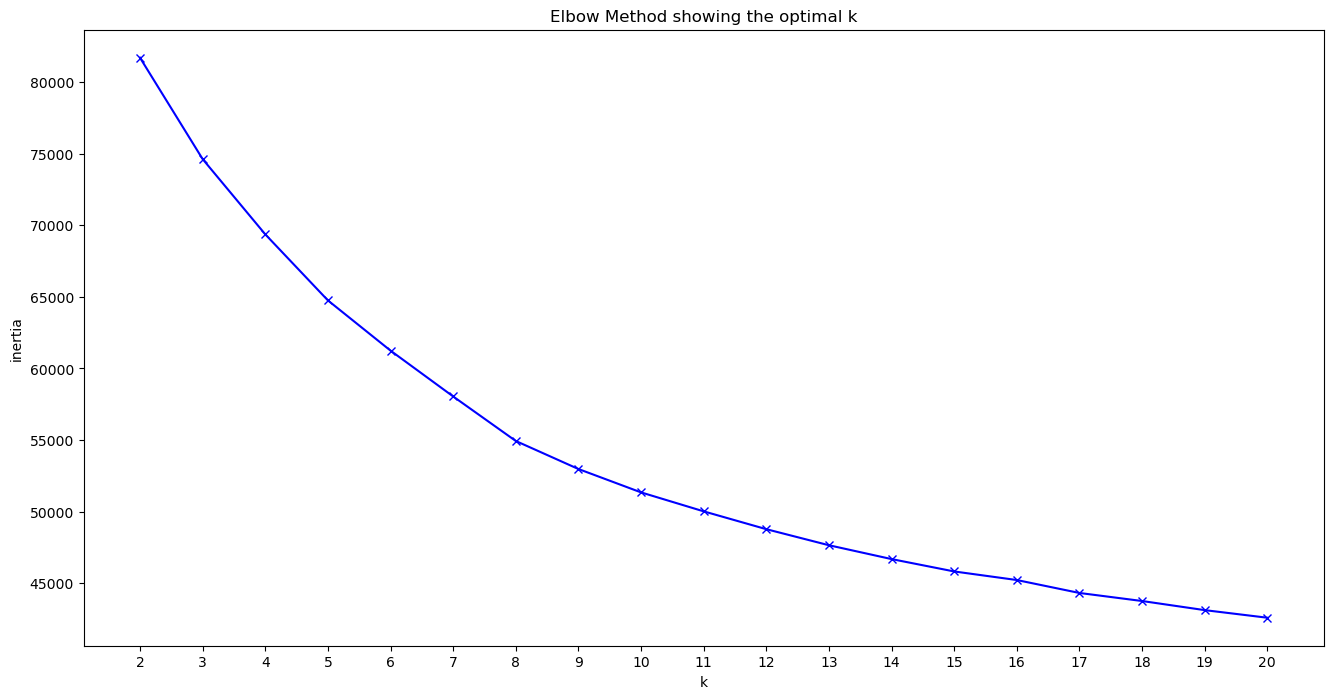

In [10]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(new_df_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

### Silouhette

/Users/brunasantos/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/brunasantos/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/brunasantos/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/brunasantos/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

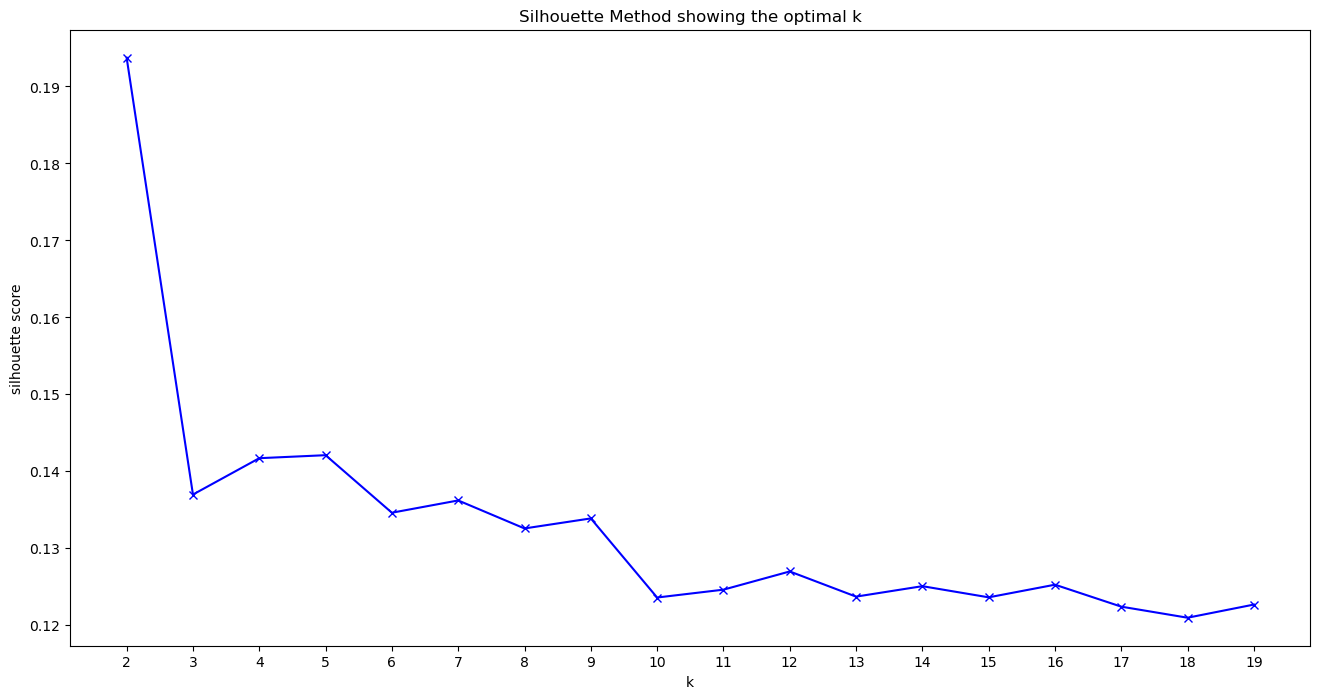

In [11]:
K = range(2, 20)
silhouette = []
for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(new_df_scaled_df)
    
    silhouette.append(silhouette_score(new_df_scaled_df, kmeans.predict(new_df_scaled_df)))
    
plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

/Users/brunasantos/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


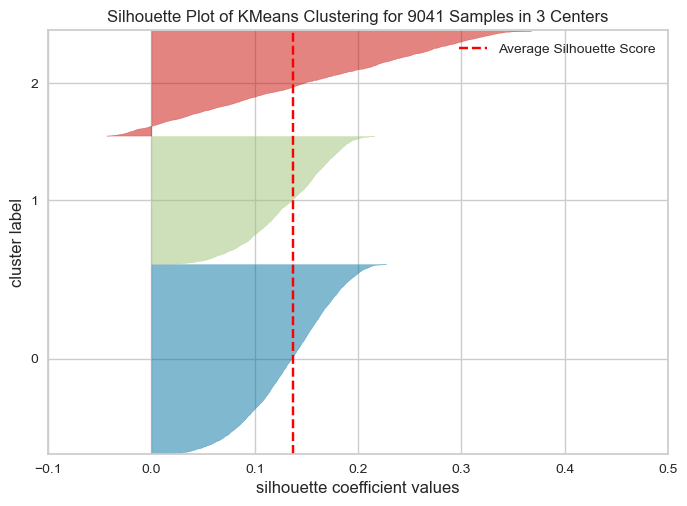

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 9041 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [12]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(new_df_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

/Users/brunasantos/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


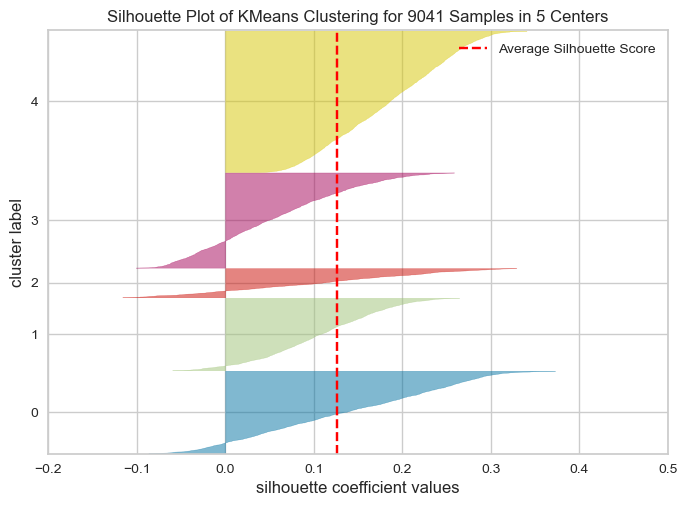

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 9041 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [13]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(new_df_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

/Users/brunasantos/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


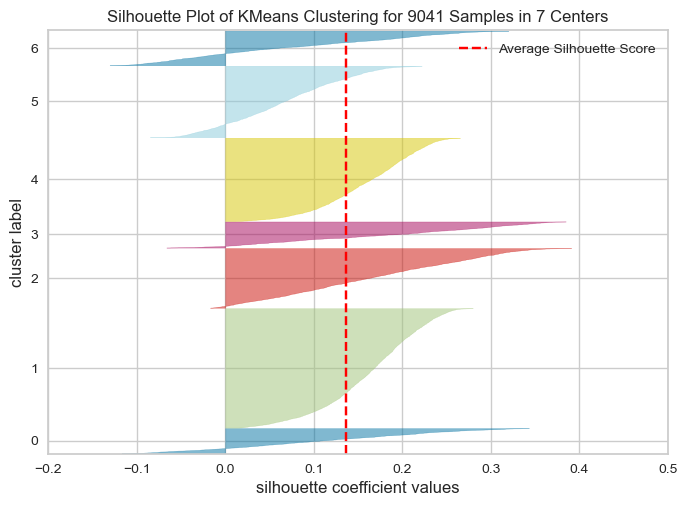

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 9041 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [14]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(7, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(new_df_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### Clustering with K-Means

In [15]:
kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans.fit(new_df_scaled_df)

/Users/brunasantos/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=1234)

In [16]:
labels = kmeans.labels_
labels

array([1, 1, 4, ..., 0, 2, 1], dtype=int32)

In [17]:
np.unique(labels)

array([0, 1, 2, 3, 4], dtype=int32)

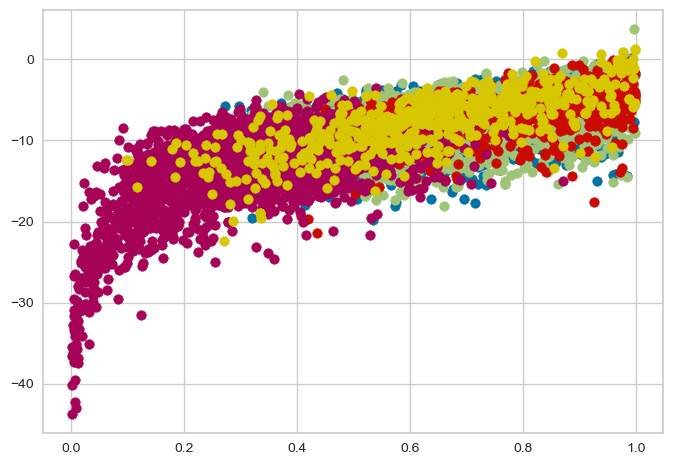

In [18]:
# assign a cluster to each example
labels = kmeans.predict(new_df_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(new_df.to_numpy()[row_ix, 1], new_df.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

In [19]:
clusters = kmeans.predict(new_df_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    2306
1    3295
2     805
3    2031
4     604
dtype: int64

In [20]:
clusters

array([1, 1, 4, ..., 0, 2, 1], dtype=int32)

## Creating the Cluster Column

In [21]:
#X_df = pd.DataFrame(X)
X["cluster"] = clusters
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,0.552,0.702,9,-5.707,1,0.1570,0.117000,0.000021,0.1050,0.5640,169.994,audio_features,1BxfuPKGuaTgP7aM0Bbdwr,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,https://api.spotify.com/v1/tracks/1BxfuPKGuaTg...,https://api.spotify.com/v1/audio-analysis/1Bxf...,178427,4,1
1,0.511,0.532,5,-5.745,1,0.0560,0.169000,0.000000,0.3110,0.3220,137.827,audio_features,3k79jB4aGmMDUQzEwa46Rz,spotify:track:3k79jB4aGmMDUQzEwa46Rz,https://api.spotify.com/v1/tracks/3k79jB4aGmMD...,https://api.spotify.com/v1/audio-analysis/3k79...,219724,4,1
2,0.855,0.678,1,-6.276,1,0.1890,0.056900,0.000037,0.4120,0.8520,99.029,audio_features,6WzRpISELf3YglGAh7TXcG,spotify:track:6WzRpISELf3YglGAh7TXcG,https://api.spotify.com/v1/tracks/6WzRpISELf3Y...,https://api.spotify.com/v1/audio-analysis/6WzR...,215467,4,4
3,0.671,0.845,11,-4.930,0,0.0480,0.020700,0.000000,0.3290,0.7750,110.056,audio_features,1vYXt7VSjH9JIM5oRRo7vA,spotify:track:1vYXt7VSjH9JIM5oRRo7vA,https://api.spotify.com/v1/tracks/1vYXt7VSjH9J...,https://api.spotify.com/v1/audio-analysis/1vYX...,176579,4,0
4,0.652,0.800,9,-4.019,0,0.0614,0.143000,0.629000,0.1120,0.2340,143.978,audio_features,7ro0hRteUMfnOioTFI5TG1,spotify:track:7ro0hRteUMfnOioTFI5TG1,https://api.spotify.com/v1/tracks/7ro0hRteUMfn...,https://api.spotify.com/v1/audio-analysis/7ro0...,231704,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9036,0.511,0.978,7,-3.867,1,0.0654,0.000185,0.000893,0.3080,0.2330,115.046,audio_features,1vCZDcHV3VaL14O01iUQVQ,spotify:track:1vCZDcHV3VaL14O01iUQVQ,https://api.spotify.com/v1/tracks/1vCZDcHV3VaL...,https://api.spotify.com/v1/audio-analysis/1vCZ...,389947,4,1
9037,0.342,0.926,7,-6.313,0,0.0939,0.000040,0.683000,0.1860,0.0972,147.313,audio_features,14JG4VbsqeLsFuDJlkybOT,spotify:track:14JG4VbsqeLsFuDJlkybOT,https://api.spotify.com/v1/tracks/14JG4VbsqeLs...,https://api.spotify.com/v1/audio-analysis/14JG...,396829,4,0
9038,0.376,0.877,10,-8.976,0,0.0419,0.000004,0.932000,0.1080,0.6140,174.031,audio_features,6AkUaYmKQMW7EhzqPqYB5n,spotify:track:6AkUaYmKQMW7EhzqPqYB5n,https://api.spotify.com/v1/tracks/6AkUaYmKQMW7...,https://api.spotify.com/v1/audio-analysis/6AkU...,335147,3,0
9039,0.371,0.652,6,-3.838,0,0.0312,0.001070,0.000002,0.6010,0.2040,81.044,audio_features,35OjKODzqSMrllo8vFFJZz,spotify:track:35OjKODzqSMrllo8vFFJZz,https://api.spotify.com/v1/tracks/35OjKODzqSMr...,https://api.spotify.com/v1/audio-analysis/35Oj...,266428,4,2


In [22]:
X[X['cluster'] == 2].sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
3208,0.394,0.305,6,-12.388,1,0.0363,0.636,0.00001,0.975,0.118,101.486,audio_features,3pAiTAdDCvqWECwRmUlxvi,spotify:track:3pAiTAdDCvqWECwRmUlxvi,https://api.spotify.com/v1/tracks/3pAiTAdDCvqW...,https://api.spotify.com/v1/audio-analysis/3pAi...,769427,4,2


In [23]:
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,0.552,0.702,9,-5.707,1,0.1570,0.117000,0.000021,0.1050,0.5640,169.994,audio_features,1BxfuPKGuaTgP7aM0Bbdwr,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,https://api.spotify.com/v1/tracks/1BxfuPKGuaTg...,https://api.spotify.com/v1/audio-analysis/1Bxf...,178427,4,1
1,0.511,0.532,5,-5.745,1,0.0560,0.169000,0.000000,0.3110,0.3220,137.827,audio_features,3k79jB4aGmMDUQzEwa46Rz,spotify:track:3k79jB4aGmMDUQzEwa46Rz,https://api.spotify.com/v1/tracks/3k79jB4aGmMD...,https://api.spotify.com/v1/audio-analysis/3k79...,219724,4,1
2,0.855,0.678,1,-6.276,1,0.1890,0.056900,0.000037,0.4120,0.8520,99.029,audio_features,6WzRpISELf3YglGAh7TXcG,spotify:track:6WzRpISELf3YglGAh7TXcG,https://api.spotify.com/v1/tracks/6WzRpISELf3Y...,https://api.spotify.com/v1/audio-analysis/6WzR...,215467,4,4
3,0.671,0.845,11,-4.930,0,0.0480,0.020700,0.000000,0.3290,0.7750,110.056,audio_features,1vYXt7VSjH9JIM5oRRo7vA,spotify:track:1vYXt7VSjH9JIM5oRRo7vA,https://api.spotify.com/v1/tracks/1vYXt7VSjH9J...,https://api.spotify.com/v1/audio-analysis/1vYX...,176579,4,0
4,0.652,0.800,9,-4.019,0,0.0614,0.143000,0.629000,0.1120,0.2340,143.978,audio_features,7ro0hRteUMfnOioTFI5TG1,spotify:track:7ro0hRteUMfnOioTFI5TG1,https://api.spotify.com/v1/tracks/7ro0hRteUMfn...,https://api.spotify.com/v1/audio-analysis/7ro0...,231704,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9036,0.511,0.978,7,-3.867,1,0.0654,0.000185,0.000893,0.3080,0.2330,115.046,audio_features,1vCZDcHV3VaL14O01iUQVQ,spotify:track:1vCZDcHV3VaL14O01iUQVQ,https://api.spotify.com/v1/tracks/1vCZDcHV3VaL...,https://api.spotify.com/v1/audio-analysis/1vCZ...,389947,4,1
9037,0.342,0.926,7,-6.313,0,0.0939,0.000040,0.683000,0.1860,0.0972,147.313,audio_features,14JG4VbsqeLsFuDJlkybOT,spotify:track:14JG4VbsqeLsFuDJlkybOT,https://api.spotify.com/v1/tracks/14JG4VbsqeLs...,https://api.spotify.com/v1/audio-analysis/14JG...,396829,4,0
9038,0.376,0.877,10,-8.976,0,0.0419,0.000004,0.932000,0.1080,0.6140,174.031,audio_features,6AkUaYmKQMW7EhzqPqYB5n,spotify:track:6AkUaYmKQMW7EhzqPqYB5n,https://api.spotify.com/v1/tracks/6AkUaYmKQMW7...,https://api.spotify.com/v1/audio-analysis/6AkU...,335147,3,0
9039,0.371,0.652,6,-3.838,0,0.0312,0.001070,0.000002,0.6010,0.2040,81.044,audio_features,35OjKODzqSMrllo8vFFJZz,spotify:track:35OjKODzqSMrllo8vFFJZz,https://api.spotify.com/v1/tracks/35OjKODzqSMr...,https://api.spotify.com/v1/audio-analysis/35Oj...,266428,4,2


In [24]:
columns_to_drop = ['type', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature']
new_df = X.drop(columns=columns_to_drop)

In [25]:
new_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,cluster
0,0.552,0.702,9,-5.707,1,0.1570,0.117000,0.000021,0.1050,0.5640,169.994,1BxfuPKGuaTgP7aM0Bbdwr,1
1,0.511,0.532,5,-5.745,1,0.0560,0.169000,0.000000,0.3110,0.3220,137.827,3k79jB4aGmMDUQzEwa46Rz,1
2,0.855,0.678,1,-6.276,1,0.1890,0.056900,0.000037,0.4120,0.8520,99.029,6WzRpISELf3YglGAh7TXcG,4
3,0.671,0.845,11,-4.930,0,0.0480,0.020700,0.000000,0.3290,0.7750,110.056,1vYXt7VSjH9JIM5oRRo7vA,0
4,0.652,0.800,9,-4.019,0,0.0614,0.143000,0.629000,0.1120,0.2340,143.978,7ro0hRteUMfnOioTFI5TG1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9036,0.511,0.978,7,-3.867,1,0.0654,0.000185,0.000893,0.3080,0.2330,115.046,1vCZDcHV3VaL14O01iUQVQ,1
9037,0.342,0.926,7,-6.313,0,0.0939,0.000040,0.683000,0.1860,0.0972,147.313,14JG4VbsqeLsFuDJlkybOT,0
9038,0.376,0.877,10,-8.976,0,0.0419,0.000004,0.932000,0.1080,0.6140,174.031,6AkUaYmKQMW7EhzqPqYB5n,0
9039,0.371,0.652,6,-3.838,0,0.0312,0.001070,0.000002,0.6010,0.2040,81.044,35OjKODzqSMrllo8vFFJZz,2


### Parameters

In [26]:
kmeans.inertia_

64757.08555414127

In [27]:
kmeans2 = KMeans(n_clusters=3,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(new_df_scaled_df)
print(kmeans2.inertia_)

76072.23664313774


## User INPUT / Embeded track player

In [28]:
from IPython.display import IFrame

In [29]:
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [44]:
song_input = input("Please, enter the song title: ")

user_input = sp.search(q= song_input, type='track', limit=1)

song_id = user_input ["tracks"]["items"][0]["id"]
song_id

display(play_song(song_id))

verified = input("Is this your song? (yes/no): ")

if verified.lower() == "yes":
    # Collect song features
    song_features = sp.audio_features([song_id])[0]
    
    # Create a DataFrame with the song features
    user_song = pd.DataFrame(song_features, index=[0])
    
    # Print the user_song DataFrame
    print("\nUser Song Features:")
    print(user_song)

Please, enter the song title: i wish you were here pink floyd


Is this your song? (yes/no): yes

User Song Features:
   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.497   0.278    7   -15.557     1       0.0513         0.731   

   instrumentalness  liveness  valence    tempo            type  \
0          0.000508     0.284    0.293  120.931  audio_features   

                       id                                   uri  \
0  0GqGrPWhmiRX9BU93AYFOW  spotify:track:0GqGrPWhmiRX9BU93AYFOW   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/0GqGrPWhmiRX...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/0GqG...       305507   

   time_signature  
0               4  


In [35]:
import pandas as pd

user =pd.DataFrame([song_features])

In [36]:
user

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.761,0.525,11,-6.9,1,0.0944,0.44,0.000007,0.0921,0.531,80.87,audio_features,3USxtqRwSYz57Ewm6wWRMp,spotify:track:3USxtqRwSYz57Ewm6wWRMp,https://api.spotify.com/v1/tracks/3USxtqRwSYz5...,https://api.spotify.com/v1/audio-analysis/3USx...,238805,4


In [37]:
columns_to_drop = ['id', 'type', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature']
user = user.drop(columns=columns_to_drop)

In [38]:
user

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.761,0.525,11,-6.9,1,0.0944,0.44,0.000007,0.0921,0.531,80.87


## Scaled & Predict

In [39]:
user_scaled = scaler.transform(user)
user_scaled_df = pd.DataFrame(user_scaled, columns=user.columns)
# Display the scaled user DataFrame
print("\nScaled User Song Features:")
user_scaled_df


Scaled User Song Features:


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.992751,-0.391525,1.578514,0.425579,0.795138,0.273356,0.494356,-0.707371,-0.590276,0.18085,-1.405034


## Recommendation

In [45]:
# Apply KMeans prediction to user_scaled_df
user_cluster = kmeans2.predict(user_scaled_df)
# Filter recommended songs based on predicted cluster
recommended_songs = new_df[new_df['cluster'] == user_cluster[0]]
# Select a random song from recommended songs
recommended_song = recommended_songs.sample(n=1)
# Retrieve track_id of recommended song
recommended_track_id = recommended_song['id'].values[0]
# Display the recommended song
display(play_song(recommended_track_id))